In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.io as pio
# open in jupyter:
pio.renderers.default = "browser"

combine monthly arrival statistics

In [12]:
import pandas as pd
import glob
import os

# 1) directory containing your 12 monthly CSVs
CSV_DIR = "Datasets/Arrival_With_Weather/2023"

desired_cols = [
    "FL_DATE","AIRLINE","AIRLINE_DOT","AIRLINE_CODE","FL_NUMBER",
    "ORIGIN","ORIGIN_CITY","DEST","DEST_CITY",
    "CRS_DEP_TIME","DEP_TIME","DEP_DELAY",
    "TAXI_OUT","WHEELS_OFF","WHEELS_ON","TAXI_IN",
    "CRS_ARR_TIME","ARR_TIME","ARR_DELAY",
    "CANCELLED","CANCELLATION_CODE","DIVERTED",
    "CRS_ELAPSED_TIME","ELAPSED_TIME","AIR_TIME","DISTANCE",
    "DELAY_DUE_CARRIER","DELAY_DUE_WEATHER","DELAY_DUE_NAS",
    "DELAY_DUE_SECURITY","DELAY_DUE_LATE_AIRCRAFT",
    # weather
    "ORIGIN_TEMP","ORIGIN_PRESSURE","ORIGIN_U_COMP_WIND",
    "ORIGIN_V_COMP_WIND","ORIGIN_PRECIP_6HR",
    "DEST_TEMP","DEST_PRESSURE","DEST_U_COMP_WIND",
    "DEST_V_COMP_WIND","DEST_PRECIP_6HR",
]

# 3) rename map: current names → desired names
rename_map = {
    # flight fields (fill in your actual current column names)
    "FlightDate": "FL_DATE",
    "Reporting_Airline": "AIRLINE",
    "DOT_ID_Reporting_Airline": "AIRLINE_DOT",
    "IATA_CODE_Reporting_Airline": "AIRLINE_CODE",
    "Flight_Number_Reporting_Airline": "FL_NUMBER",
    "Origin": "ORIGIN",
    "OriginCityName": "ORIGIN_CITY",
    "Dest": "DEST",
    "DestCityName": "DEST_CITY",
    "CRSDepTime": "CRS_DEP_TIME",
    "DepTime": "DEP_TIME",
    "DepDelay": "DEP_DELAY",
    "TaxiOut": "TAXI_OUT",
    "WheelsOff": "WHEELS_OFF",
    "WheelsOn": "WHEELS_ON",
    "TaxiIn": "TAXI_IN",
    "CRSArrTime": "CRS_ARR_TIME",
    "ArrTime": "ARR_TIME",
    "ArrDelay": "ARR_DELAY",
    "Cancelled": "CANCELLED",
    "CancellationCode": "CANCELLATION_CODE",
    "Diverted": "DIVERTED",
    "CRSElapsedTime": "CRS_ELAPSED_TIME",
    "ActualElapsedTime": "ELAPSED_TIME",
    "AirTime": "AIR_TIME",
    "Distance": "DISTANCE",
    "CarrierDelay": "DELAY_DUE_CARRIER",
    "WeatherDelay": "DELAY_DUE_WEATHER",
    "NASDelay": "DELAY_DUE_NAS",
    "SecurityDelay": "DELAY_DUE_SECURITY",
    "LateAircraftDelay": "DELAY_DUE_LATE_AIRCRAFT",
    "Origin_2m_temperature": "ORIGIN_TEMP",
    "Origin_mean_sea_level_pressure": "ORIGIN_PRESSURE",
    "Origin_10m_u_component_of_wind": "ORIGIN_U_COMP_WIND",
    "Origin_10m_v_component_of_wind": "ORIGIN_V_COMP_WIND",
    "Origin_total_precipitation_6hr": "ORIGIN_PRECIP_6HR",
    "Dest_2m_temperature": "DEST_TEMP",
    "Dest_mean_sea_level_pressure": "DEST_PRESSURE",
    "Dest_10m_u_component_of_wind": "DEST_U_COMP_WIND",
    "Dest_10m_v_component_of_wind": "DEST_V_COMP_WIND",
    "Dest_total_precipitation_6hr": "DEST_PRECIP_6HR"
}

# 4) gather, standardize, and concatenate
all_files = sorted(glob.glob(os.path.join(CSV_DIR, "*.csv")))
standardized_dfs = []

for fp in all_files:
    df = pd.read_csv(fp, low_memory=False)
    # 1) rename to get FL_DATE in place
    df = df.rename(columns=rename_map)
    # 2) now safely parse the new FL_DATE
    df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])

    # ensure every desired column exists
    for col in desired_cols:
        if col not in df.columns:
            df[col] = pd.NA
    # select & reorder
    df = df[desired_cols]
    standardized_dfs.append(df)

# final merge
merged = pd.concat(standardized_dfs, ignore_index=True)

# 5) save out the combined dataset
merged.to_csv("Datasets/2023_Arrival_Combined.csv", index=False)


Load and view dataset

In [2]:
#df_raw = pd.read_csv("../data/flights_sample_3m.csv", encoding="utf-8")
df_augmented = pd.read_csv("Datasets/2023_Arrival_Combined.csv", encoding="utf-8")

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\4199353549.py:2: DtypeWarning:

Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df = df_augmented


In [4]:

df.shape

(6847899, 41)

In [5]:

df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'FL_NUMBER',
       'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
       'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT',
       'ORIGIN_TEMP', 'ORIGIN_PRESSURE', 'ORIGIN_U_COMP_WIND',
       'ORIGIN_V_COMP_WIND', 'ORIGIN_PRECIP_6HR', 'DEST_TEMP', 'DEST_PRESSURE',
       'DEST_U_COMP_WIND', 'DEST_V_COMP_WIND', 'DEST_PRECIP_6HR'],
      dtype='object')

In [6]:

df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,...,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
0,2023-01-02,9E,20363,9E,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,...,274.93674,101594.630,0.802523,0.581528,0.000000,279.32574,101669.69,2.430652,1.073036,0.000002
1,2023-01-03,9E,20363,9E,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,...,272.82083,102107.070,0.402551,-0.698235,0.000000,282.40952,102038.56,-0.593046,2.676474,0.000414
2,2023-01-04,9E,20363,9E,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,...,278.75700,100796.586,0.680189,1.778630,0.004196,283.35420,100911.00,3.174283,3.412431,0.001676
3,2023-01-05,9E,20363,9E,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,...,278.44290,101170.250,-1.195706,-2.162482,0.002251,283.64417,100968.87,0.762427,0.292270,0.000692
4,2023-01-06,9E,20363,9E,4628,BDL,"Hartford, CT",LGA,"New York, NY",800,...,275.91437,101580.010,-1.507366,-1.388206,0.000162,280.19208,101450.96,-2.978482,0.235919,0.000157


Convert FL_DATE to "datetime" recognized by pandas

In [7]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d').copy()

Toggle assertions on or off

In [8]:
TEST: bool = True

Drop cancelled and diverted flights, they are outside of our scope. we only want delayed flights(keep until finished with visualizations)

Attempt to drop duplicates, we found out there aren't any

In [9]:
df_len_with_duplicates = len(df)
df.drop_duplicates(inplace=True)
if TEST:
  assert len(df) == df_len_with_duplicates  # no duplicates

In [10]:
delay_cols = [
    "DELAY_DUE_CARRIER",
    "DELAY_DUE_WEATHER",
    "DELAY_DUE_NAS",
    "DELAY_DUE_SECURITY",
    "DELAY_DUE_LATE_AIRCRAFT"
]

def split_by_components(df: pd.DataFrame):
    # cancelled or diverted masks
    cancelled = df["CANCELLED"] == 1
    diverted  = df["DIVERTED"]  == 1

    # has _any_ positive delay component?
    has_delay = df[delay_cols].gt(0).any(axis=1)

    # only keep non‑cancelled & non‑diverted rows
    valid     = ~(cancelled | diverted)

    # slice full-rows (including weather) into two sets
    delay_df    = df.loc[has_delay  & valid].copy()
    no_delay_df = df.loc[~has_delay & valid].copy()
    n_cancel_df   = df.loc[cancelled | diverted].copy()

    return delay_df, no_delay_df, n_cancel_df

# 3) run the split
delay_df, no_delay_df, cancel_df = split_by_components(df)

Visualize presence of delay components

In [11]:
# 4) plot in Plotly
fig = px.pie(
    values=[len(delay_df), len(no_delay_df), len(cancel_df)],
    names=["Has delay components",
           "Missing delay components",
           "Cancelled or Diverted"])
fig.update_layout(
    title_text="Y Delay Components",
    title_x=0.5,
    width=800,
    height=600)
fig.show()


Visualize presence of delay components over each month in the dataset. Blue represents data that we can use.

In [12]:


# 2) get Year‑Month counts on each
delay_counts    = delay_df  ["FL_DATE"].dt.strftime("%Y-%m").value_counts().sort_index()
no_delay_counts = no_delay_df["FL_DATE"].dt.strftime("%Y-%m").value_counts().sort_index()
cancel_counts   = cancel_df ["FL_DATE"].dt.strftime("%Y-%m").value_counts().sort_index()

# 3) combine into one DataFrame
monthly = pd.concat(
    [delay_counts, no_delay_counts, cancel_counts],
    axis=1,
    keys=["Has Delay Components", "Missing Delay Components", "Cancelled or Diverted"]
).fillna(0).astype(int)

# 4) reset index to turn Year‑Month into a column
monthly = monthly.reset_index().rename(columns={"index": "FL_DATE"})

# 5) plot as a stacked bar
fig = px.bar(
    monthly,
    x="FL_DATE",
    y=["Has Delay Components", "Missing Delay Components", "Cancelled or Diverted"],
    barmode="stack",
    labels={"value": "Count", "variable": "Delay Status"}
)
fig.update_xaxes(type="category")   # preserve chronological order
fig.update_layout(
    title_text="Monthly Delay Component Breakdown",
    title_x=0.5,
    font=dict(family="Arial, sans-serif", size=20),
    width=1200
)
fig.show()


Ensure that delay components always sum to equal arrival delay(it doesnt)

In [13]:
#if TEST:
#  def check_delay_components_sum_to_arr_delay(row) -> bool:
#      components_delay = row[['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER',
#                            'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
#                            'DELAY_DUE_LATE_AIRCRAFT']].sum()
#      return components_delay == row['ARR_DELAY']
#
#  assert delay_components_df.apply(check_delay_components_sum_to_arr_delay, axis=1).all()

In [14]:
# 1) your delay component columns
delay_cols = [
    'DELAY_DUE_CARRIER','DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS','DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]


# 2) build a mask of “has any delay component > 0”
mask = df[delay_cols].fillna(0).sum(axis=1) > 0

# 3) slice out those rows (and copy to avoid SettingWithCopyWarnings)
delay_components_df = df.loc[mask].copy()

# (Optionally you can also build the other two sets:)
no_delay_components_df = df.loc[~mask & (df['CANCELLED']==0) & (df['DIVERTED']==0)].copy()
cancelled_or_diverted_df = df.loc[(df['CANCELLED']==1) | (df['DIVERTED']==1)].copy()


# 2) compute component sums, filling NaN→0
comp_sum = delay_components_df[delay_cols].fillna(0).sum(axis=1)

# 3) compare to ARR_DELAY (also fillna→0 just in case)
arr_delay = delay_components_df['ARR_DELAY'].fillna(0)
matches  = comp_sum.eq(arr_delay)

# 4) show the offending row(s)
mismatches = delay_components_df.loc[~matches, delay_cols + ['ARR_DELAY','FL_DATE','AIRLINE']]
print(f"{len(mismatches)} bad row(s):")
print(mismatches)

# 5) if you want to see the difference explicitly
mismatches = mismatches.assign(Difference=comp_sum[~matches] - arr_delay[~matches])
print(mismatches)


0 bad row(s):
Empty DataFrame
Columns: [DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT, ARR_DELAY, FL_DATE, AIRLINE]
Index: []
Empty DataFrame
Columns: [DELAY_DUE_CARRIER, DELAY_DUE_WEATHER, DELAY_DUE_NAS, DELAY_DUE_SECURITY, DELAY_DUE_LATE_AIRCRAFT, ARR_DELAY, FL_DATE, AIRLINE, Difference]
Index: []


Set data to just the delay components to simplify referencing below

In [15]:
data = delay_components_df.copy()

Remove outliers using IQR method on the overall arrival delay

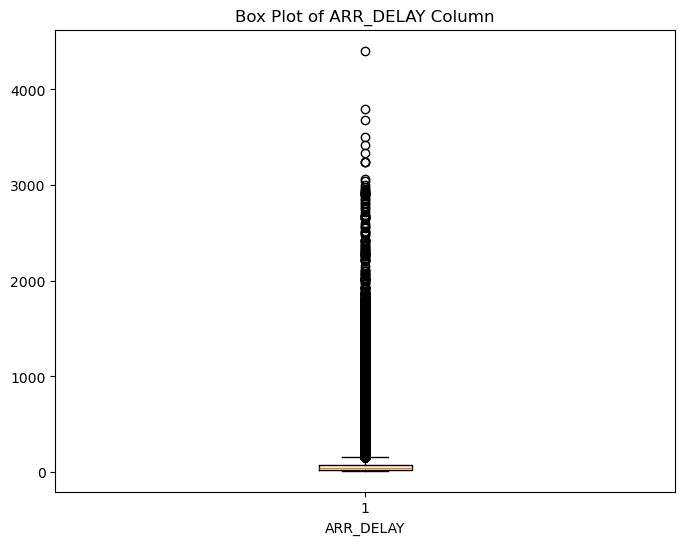

Summary Statistics after Removing Outliers:
count    1.270149e+06
mean     4.764275e+01
std      3.267652e+01
min      1.500000e+01
25%      2.300000e+01
50%      3.600000e+01
75%      6.300000e+01
max      1.540000e+02
Name: ARR_DELAY, dtype: float64
count    1.386697e+06
mean     6.901156e+01
std      1.021215e+02
min      1.500000e+01
25%      2.400000e+01
50%      3.900000e+01
75%      7.600000e+01
max      4.405000e+03
Name: ARR_DELAY, dtype: float64
0.08404719992904001
116548


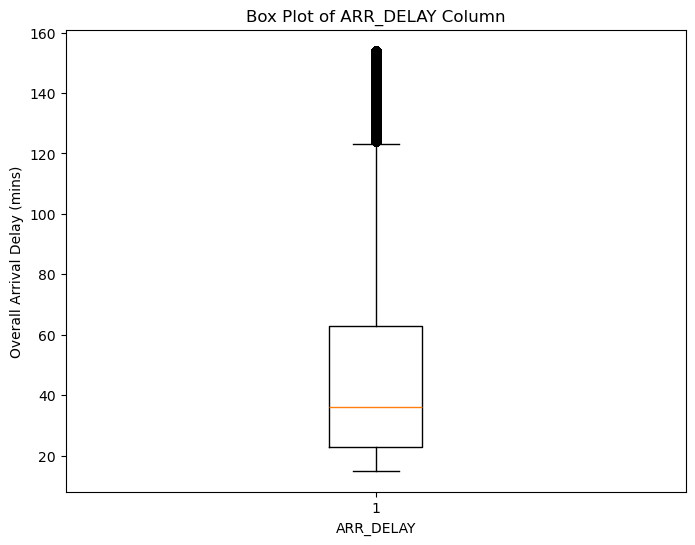

In [16]:
# Boxplot before removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data['ARR_DELAY'])
plt.title('Box Plot of ARR_DELAY Column')
plt.xlabel('ARR_DELAY')
plt.show()

# Calculate Q1, Q3, IQR
Q1 = data['ARR_DELAY'].quantile(0.25)
Q3 = data['ARR_DELAY'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data[(data['ARR_DELAY'] >= lower_bound) & (data['ARR_DELAY'] <= upper_bound)]

cat_cols = ['CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME',
      'DISTANCE', "DEP_DELAY", "ARR_DELAY",
    "DELAY_DUE_CARRIER", "DELAY_DUE_WEATHER",
    "DELAY_DUE_NAS",     "DELAY_DUE_SECURITY",
    "DELAY_DUE_LATE_AIRCRAFT"
]
non_cat_cols = ["CRS_DEP_TIME", "TAXI_OUT", "TAXI_IN",
    "CRS_ARR_TIME", "CRS_ELAPSED_TIME",
    "DISTANCE", "ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",
    "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR",
    "DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND",
    "DEST_V_COMP_WIND", "DEST_PRECIP_6HR",
]
X_cols = []
y_cols = []


print("Summary Statistics after Removing Outliers:")
print(data_no_outliers['ARR_DELAY'].describe())
print(data["ARR_DELAY"].describe())

print((len(data) - len(data_no_outliers)) / len(data))
print((len(data) - len(data_no_outliers)))

# Box plot after removing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data_no_outliers['ARR_DELAY'])
plt.title('Box Plot of ARR_DELAY Column')
plt.xlabel('ARR_DELAY')
plt.ylabel("Overall Arrival Delay (mins)")
plt.show()


Calculate Pearson Correlation on just the non-categorical attributes, since Pearson Correlation is invalid for categorical attributes

In [17]:
from scipy.stats import pearsonr

def calculate_pearson_score(df: pd.DataFrame, col: str, y) -> float:
  """
  Calculates the Pearson correlation coefficient between two columns in a DataFrame.

  Args:
    df: DataFrame.
    col: The name of the first column.
    y: The name of the second column.

  Returns:
    Pearson correlation coefficient.
  """
  try:
    corr,_ = pearsonr(df[col].values, y.values)
    return corr
  except:
    return 0

# Calculate the Pearson correlation coefficient for each column w/ ARR_DELAY
pearson_scores = {}
cols=['CRS_DEP_TIME', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME',
      'DISTANCE',"ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",
      "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR",
      "DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND",
      "DEST_V_COMP_WIND", "DEST_PRECIP_6HR"]

for col in cols:
    pearson_scores[col] = calculate_pearson_score(data_no_outliers, col, data_no_outliers["ARR_DELAY"])

# Sort the Pearson correlation coefficients
sorted_pearson_scores = sorted(pearson_scores.items(), key=lambda x: x[1], reverse=True)

for col, score in sorted_pearson_scores:
    print(f"{col}: {score}")

# NOTE: ELAPSED TIME IS REDUNDANT

CRS_DEP_TIME: 0.07407917111855784
TAXI_OUT: 0.06187432676257396
CRS_ARR_TIME: 0.04853531121019309
ORIGIN_PRESSURE: 0.024414119671073917
ORIGIN_U_COMP_WIND: 0.024165434052232388
TAXI_IN: 0.022175173119465576
DEST_U_COMP_WIND: 0.01624757163874934
ORIGIN_TEMP: 0.008072361478642652
DEST_PRESSURE: 0.007925659735967759
CRS_ELAPSED_TIME: 0.002509172031010046
DEST_TEMP: -0.005217056852510849
DISTANCE: -0.007357982490976743
ORIGIN_PRECIP_6HR: -0.020797626059848785
DEST_PRECIP_6HR: -0.02333017758937116
DEST_V_COMP_WIND: -0.0313968981898663
ORIGIN_V_COMP_WIND: -0.03148373034768426


Calculate Kruskal-Wallis H-test to sort categorical attributes and prove redundancy for some attributes

In [18]:
from scipy.stats import kruskal

cols = ['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE',
        'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY']

# Calculate the Kruskal-Wallis H statistic for each categorical variable
h_values = {}
for col in cols:
    h, p_value = kruskal(*[group['ARR_DELAY'] for name, group in data_no_outliers.groupby(col)])
    h_values[col] = h

# Sort the columns by their H values
sorted_cols = sorted(h_values, key=h_values.get, reverse=True)

print("Categorical columns ranked by their correlation with:")
for col in sorted_cols:
    print(f"{col}: {h_values[col]}")

# drop AIRLINE_DOT, AIRLINE_CODE, DOT_CODE bc redundant w/ AIRLINE
# drop ORIGIN_CITY, DEST_CITY bc redundant (basically) w/ ORIGIN, DEST

Categorical columns ranked by their correlation with:
FL_DATE: 27434.88312181075
AIRLINE: 17129.23252574313
AIRLINE_DOT: 17129.23252574313
AIRLINE_CODE: 17129.23252574313
FL_NUMBER: 14780.626189139322
ORIGIN: 12941.355576003874
ORIGIN_CITY: 12220.34852443491
DEST: 9862.251717380183
DEST_CITY: 9604.360975766618


In [19]:
X_df = data_no_outliers[
    [
        "FL_DATE",  # yyymmdd of flight (ordinal, discrete),
        "FL_NUMBER",
        "AIRLINE",  # name of airline (nominal, discrete)
        # Ignore AIRLINE_CODE because it is redundant
        "ORIGIN",  # origin airport code (nomincal, discrete)
        # Ignore ORIGIN_CITY because it is redundant
        "DEST",  # destination airport code (nomincal, discrete)
        # Ignore DEST_CITY because it is redundant
        "CRS_DEP_TIME",  # hhmm planned departure time (ordinal, discrete)
        "CRS_ARR_TIME",  # hhmm planned arrival time (ordinal, discrete)
        # Ignore CRS_ELAPSED_TIME because it is redundant since we have CRS_DEP_TIME and CRS_ARR_TIME
        "DISTANCE",  # miles between airports (ratio, discrete)
        "TAXI_IN",
        "TAXI_OUT",
        "ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",  #weather observations and 'predictions'
        "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR",
        "DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND",
        "DEST_V_COMP_WIND", "DEST_PRECIP_6HR"
    ]
]

Y_df = data_no_outliers[
    [
        # "CANCELLATION_CODE",  # reason for cancellation, NA if not cancelled (nominal, discrete)
        # Ignore CANCELLED because it is redundant, CANCELLATION_CODE provides more information
        # "DIVERTED",  # 1 if diverted, 0 if not (ordinal, discrete) NOTE: NOT SURE IF WE WANT TO KEEP
        # "AIR_TIME",  # Flight time, minutes (ratio, discrete)
        "DELAY_DUE_CARRIER",  # delay due to technical difficulties / damage / carrier efficiency (ratio, discrete)
        # Hypothesis: AIRLINE, ORIGIN, DEST may inform DELAY_DUE_CARRIER
        "DELAY_DUE_WEATHER",  # delay due to weather (ratio, discrete)
        # Hypothesis: FL_DATE, ORIGIN, DEST may inform DELAY_DUE_WEATHER
        "DELAY_DUE_SECURITY",  # delay due to security (ratio, discrete)
        # Hypothesis: FL_DATE, ORIGIN, CRS_DEP_TIME, DISTANCE may inform DELAY_DUE_SECURITY,
        "DELAY_DUE_NAS",  # not sure how this will do due to lacking info in features
        "DELAY_DUE_LATE_AIRCRAFT"  # delay due to late aircraft (ratio, discrete)
        # Hypothesis: AIRLINE, CRS_DEP_TIME may inform DELAY_DUE_LATE_AIRCRAFT
    ]
]

arr_only_y_df = data_no_outliers["ARR_DELAY"]

# AIRLINE_CODE, DOT_CODE, FL_NUMBER are ignored because they are unique identifiers
# TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN are ignored because they seem irrelevant NOTE: MAY WANT TO LOOK INTO THIS
# DEP_TIME, DEP_DELAY, ARR_TIME, ARR_DELAY, ELAPSED_TIME are ignored because the individual delay contributions factor into them

# WARNING: DELAY_DUE_NAS might not have sufficient info to predict this. It is National Air System Delay, minutes.


Check if there are any NA values in X_df. There are none

In [20]:
# Look for any NA values in X
if TEST:
  X_df.replace('', np.nan, inplace=True)
  pd.isna(X_df).sum().sum() == 0

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\3653023300.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Label encode airline and airport. ORIGIN and DEST should be encoded together to preserve the relationship between outbound and inbound same airports.

In [21]:
# Assign integer labels to airline
airline_encoder = LabelEncoder()
X_df["AIRLINE"] = airline_encoder.fit_transform(X_df["AIRLINE"])

# Assign integer labels to airport code
airport_encoder = LabelEncoder()
airport_encoder.fit(pd.concat([X_df["ORIGIN"],X_df["DEST"]], axis=0))
X_df["ORIGIN"] = airport_encoder.transform(X_df["ORIGIN"])
X_df["DEST"] = airport_encoder.transform(X_df["DEST"])
# assert X_df.loc[1, "ORIGIN"] == X_df.loc[3, "ORIGIN"] == X_df.loc[2, "DEST"]  # all MSP

X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\1727180027.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\1727180027.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\1727180027.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
11,2023-01-11,4629,0,193,32,2129,2228,147.0,3.0,46.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082
12,2023-01-12,4629,0,193,32,2129,2228,147.0,5.0,16.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082
13,2023-01-13,4629,0,193,32,2129,2228,147.0,3.0,61.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082
16,2023-01-17,4629,0,193,32,2129,2228,147.0,9.0,35.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082
19,2023-01-20,4629,0,193,32,2129,2228,147.0,3.0,20.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082


Show number of unique airports

In [22]:
print(f"Number of airports: {max([max(X_df['ORIGIN']), max(X_df['DEST'])]) + 1}")

Number of airports: 350


Convert hhmm time format to minutes past midnight

In [23]:
def convert_hhmm_to_mins(hhmm_list):
  hours = []
  mins = []

  # Look at str length to determine number of hours and mins
  for s in hhmm_list:
    if len(s) == 1:
      hours.append(0)
      mins.append(int(s))
    elif len(s) == 2:
      hours.append(0)
      mins.append(int(s))
    elif len(s) == 3:
      hours.append(int(s[0]))
      mins.append(int(s[1:]))
    elif len(s) == 4:
        hours.append(int(s[:2]))
        mins.append(int(s[2:]))
    else:
      raise ValueError(s)

  # Calculate total minutes
  return np.array(hours) * 60 + np.array(mins)

# Convert hhmm times to minutes
X_df["CRS_DEP_TIME"] = X_df["CRS_DEP_TIME"].astype(str)
X_df["CRS_DEP_TIME"] = convert_hhmm_to_mins(X_df["CRS_DEP_TIME"])
# assert X_df["CRS_DEP_TIME"][:5].tolist() == [715, 1280, 594, 969, 1120]

X_df["CRS_ARR_TIME"] = X_df["CRS_ARR_TIME"].astype(str)
X_df["CRS_ARR_TIME"] = convert_hhmm_to_mins(X_df["CRS_ARR_TIME"])
# assert X_df["CRS_ARR_TIME"][:5].tolist() == [901, 1395, 772, 1109, 1241]

X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\3880266324.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\3880266324.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\3880266324.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
11,2023-01-11,4629,0,193,32,1289,1348,147.0,3.0,46.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082
12,2023-01-12,4629,0,193,32,1289,1348,147.0,5.0,16.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082
13,2023-01-13,4629,0,193,32,1289,1348,147.0,3.0,61.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082
16,2023-01-17,4629,0,193,32,1289,1348,147.0,9.0,35.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082
19,2023-01-20,4629,0,193,32,1289,1348,147.0,3.0,20.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082


Convert distance to an integer in case it is not. Data is recorded as discrete integer values.

In [24]:
# Convert distance to int, its already an int basically
X_df["DISTANCE"] = df["DISTANCE"].astype(int)
X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\2097329403.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,FL_DATE,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
11,2023-01-11,4629,0,193,32,1289,1348,147,3.0,46.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082
12,2023-01-12,4629,0,193,32,1289,1348,147,5.0,16.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082
13,2023-01-13,4629,0,193,32,1289,1348,147,3.0,61.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082
16,2023-01-17,4629,0,193,32,1289,1348,147,9.0,35.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082
19,2023-01-20,4629,0,193,32,1289,1348,147,3.0,20.0,278.4069,101656.21,3.111064,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082


Break datetime into separate YEAR, MONTH, DAY attributes

In [25]:
# Convert FL_DATE column to datetime
X_df['FL_DATE'] = pd.to_datetime(X_df['FL_DATE'])

X_df['YEAR'] = X_df['FL_DATE'].dt.year
X_df['MONTH'] = X_df['FL_DATE'].dt.month
X_df['DAY'] = X_df['FL_DATE'].dt.day

# Drop the original column
X_df.drop(columns=['FL_DATE'], inplace=True)

if TEST:
    assert X_df["MONTH"].min() == 1
    assert X_df["MONTH"].max() == 12
    assert X_df["DAY"].min() == 1
    assert X_df["DAY"].max() == 31

X_df.head()

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\2737446006.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\2737446006.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\2737446006.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,FL_NUMBER,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,...,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR,YEAR,MONTH,DAY
11,4629,0,193,32,1289,1348,147,3.0,46.0,278.4069,...,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082,2023,1,11
12,4629,0,193,32,1289,1348,147,5.0,16.0,278.4069,...,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082,2023,1,12
13,4629,0,193,32,1289,1348,147,3.0,61.0,278.4069,...,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082,2023,1,13
16,4629,0,193,32,1289,1348,147,9.0,35.0,278.4069,...,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082,2023,1,17
19,4629,0,193,32,1289,1348,147,3.0,20.0,278.4069,...,-1.56233,-1.117587e-08,273.08673,101749.44,1.73652,-1.428155,0.000082,2023,1,20


In [26]:
X_df.drop(columns=["FL_NUMBER"], inplace=True)
X_df

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\3038037169.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,ORIGIN_TEMP,ORIGIN_PRESSURE,...,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR,YEAR,MONTH,DAY
11,0,193,32,1289,1348,147,3.0,46.0,278.40690,101656.21,...,-1.562330,-1.117587e-08,273.08673,101749.440,1.736520,-1.428155,8.236058e-05,2023,1,11
12,0,193,32,1289,1348,147,5.0,16.0,278.40690,101656.21,...,-1.562330,-1.117587e-08,273.08673,101749.440,1.736520,-1.428155,8.236058e-05,2023,1,12
13,0,193,32,1289,1348,147,3.0,61.0,278.40690,101656.21,...,-1.562330,-1.117587e-08,273.08673,101749.440,1.736520,-1.428155,8.236058e-05,2023,1,13
16,0,193,32,1289,1348,147,9.0,35.0,278.40690,101656.21,...,-1.562330,-1.117587e-08,273.08673,101749.440,1.736520,-1.428155,8.236058e-05,2023,1,17
19,0,193,32,1289,1348,147,3.0,20.0,278.40690,101656.21,...,-1.562330,-1.117587e-08,273.08673,101749.440,1.736520,-1.428155,8.236058e-05,2023,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6847801,14,112,165,659,798,645,4.0,22.0,278.29956,101672.83,...,-1.407122,4.805624e-07,281.96234,101304.640,2.406435,2.189496,2.441928e-06,2023,9,1
6847805,14,65,238,938,1013,196,23.0,31.0,274.00406,101319.16,...,-2.293403,-1.117587e-08,279.99756,101143.550,0.438053,1.633938,-1.117587e-08,2023,9,1
6847822,14,112,139,510,638,594,6.0,24.0,278.29956,101672.83,...,-1.407122,4.805624e-07,285.09980,101671.420,0.743097,1.677455,-1.117587e-08,2023,9,1
6847867,14,112,268,1170,1246,160,5.0,44.0,278.29956,101672.83,...,-1.407122,4.805624e-07,278.38740,101499.836,2.783123,-1.375210,-1.117587e-08,2023,9,1


Taxi in and taxi out to int

In [27]:
X_df["TAXI_IN"] = X_df["TAXI_IN"].astype(int)
X_df["TAXI_OUT"] = X_df["TAXI_OUT"].astype(int)

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\3527431485.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\3527431485.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Look for any NA values in Y. We found that there are not any

In [28]:
if TEST:
  Y_df.replace('', np.nan, inplace=True)
  assert pd.isna(Y_df).sum().sum() == 0

C:\Users\ebror\AppData\Local\Temp\ipykernel_35924\3814927210.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Convert Y to int (all values are already integers in the data). Ensure length matches length of X_df.

In [29]:
Y_df = Y_df.astype(int)
if TEST:
  assert len(X_df) == len(Y_df)

In [30]:
arr_only_y_df = arr_only_y_df.astype(int)

Split into train and test using 75/25 split and random_state

In [31]:
X_train, X_test, Y_train, Y_test, y_arr_only_train, y_arr_only_test = train_test_split(X_df, Y_df, arr_only_y_df, random_state=42, test_size=0.25)

Scale numeric columns using Z-normalization. Fit to X_train, apply to X_test to prevent data leakage.

In [35]:
numeric_columns = ["CRS_DEP_TIME", "CRS_ARR_TIME", "DISTANCE", "TAXI_IN", "TAXI_OUT","ORIGIN_TEMP", "ORIGIN_PRESSURE", "ORIGIN_U_COMP_WIND",
    "ORIGIN_V_COMP_WIND", "ORIGIN_PRECIP_6HR","DEST_TEMP", "DEST_PRESSURE", "DEST_U_COMP_WIND","DEST_V_COMP_WIND", "DEST_PRECIP_6HR"]
categorical_columns = ["AIRLINE", "ORIGIN", "DEST", "YEAR", "MONTH", "DAY"]
scaler = StandardScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train[numeric_columns]), columns=numeric_columns, index=X_train.index)
X_test_scale = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns, index=X_test.index)

X_train_scale = pd.concat([X_train[categorical_columns], X_train_scale], axis=1)
X_test_scale = pd.concat([X_test[categorical_columns], X_test_scale], axis=1)

X_train_scale.head()

,AIRLINE,ORIGIN,DEST,YEAR,MONTH,DAY,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,...,ORIGIN_TEMP,ORIGIN_PRESSURE,ORIGIN_U_COMP_WIND,ORIGIN_V_COMP_WIND,ORIGIN_PRECIP_6HR,DEST_TEMP,DEST_PRESSURE,DEST_U_COMP_WIND,DEST_V_COMP_WIND,DEST_PRECIP_6HR
5742700,1,70,310,2023,8,10,0.905947,0.941212,2.249878,-0.374217,...,0.186183,0.450831,0.164518,0.061185,-0.318100,0.035189,-1.628345,-0.890772,1.985382,1.806881
1949707,9,55,182,2023,12,4,1.264884,1.088899,-1.075362,3.795674,...,0.073117,0.205285,0.507889,1.240397,4.325626,0.003966,-0.442487,-0.909051,0.892119,-0.312874
3532769,4,297,182,2023,4,25,-1.109079,-0.714116,-0.015760,0.337715,...,-0.709939,-2.684445,-1.477167,-1.312850,-0.279412,0.003966,-0.442487,-0.909051,0.892119,-0.312874
6216463,13,232,182,2023,8,20,0.305348,0.298157,-0.772619,-0.577627,...,-0.031304,-1.229749,1.806933,1.511758,0.742336,0.003966,-0.442487,-0.909051,0.892119,-0.312874
2595389,13,207,252,2023,2,15,1.407037,-2.917117,0.933603,-0.475922,...,-0.785860,-0.704611,-0.306203,0.251370,-0.318100,0.253301,0.993150,-1.355153,-0.343432,-0.336587


Save label-encoded X data to CSV

In [36]:
X_train_scale.to_csv("data/X_train_label.csv", index=False)
X_test_scale.to_csv("data/X_test_label.csv", index=False)

Save Y data to CSV

In [37]:
Y_train.to_csv("data/Y_train.csv", index=False)
Y_test.to_csv("data/Y_test.csv", index=False)
y_arr_only_train.to_csv("data/arr_delay_only_y_train.csv", index=False)
y_arr_only_test.to_csv("data/arr_delay_only_y_test.csv", index=False)

STOP

RUN splits through next of the jupyter notebooks in README.md

Try out PCA on the non-categorical columns. We don't see any meaningful improvement so we don't use PCA

In [ ]:
for n_components in range(1, len(numeric_columns)):
    pca = PCA(n_components=n_components)
    cols = [f"PCA{i}" for i in range(1, n_components + 1)]

    principal_components = pca.fit_transform(X_train[numeric_columns])
    principal_components = pd.DataFrame(principal_components, columns=cols)

    print(f"{n_components} components:")
    for col in cols:
        print(f"{col} correlation: {calculate_pearson_score(principal_components, col, Y_train.sum(axis=1))}")
    print("\n")

1 components:
PCA1 correlation: -0.024139939884932488


2 components:
PCA1 correlation: -0.02413993988493264
PCA2 correlation: -0.064985573442742


3 components:
PCA1 correlation: -0.024139939884932494
PCA2 correlation: -0.06498557344274201
PCA3 correlation: 0.026945497112211805


4 components:
PCA1 correlation: -0.024139939884932463
PCA2 correlation: -0.06498557344274206
PCA3 correlation: 0.02694549711221145
PCA4 correlation: 0.06025599295851206




One-hot encode and split again

In [ ]:
X_one_hot = pd.get_dummies(X_df, columns=["YEAR", "MONTH", "DAY", 'AIRLINE', 'DEST', 'ORIGIN'])  # one-hot encode
X_train, X_test, Y_train, Y_test, y_arr_only_train, y_arr_only_test = train_test_split(X_one_hot, Y_df, arr_only_y_df, random_state=42, test_size=0.25)
X_one_hot.head()

,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,YEAR_2019,YEAR_2020,YEAR_2021,YEAR_2022,YEAR_2023,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,DAY_1,DAY_2,DAY_3,DAY_4,DAY_5,DAY_6,DAY_7,DAY_8,DAY_9,DAY_10,DAY_11,DAY_12,DAY_13,DAY_14,DAY_15,DAY_16,DAY_17,DAY_18,...,ORIGIN_340,ORIGIN_341,ORIGIN_342,ORIGIN_343,ORIGIN_344,ORIGIN_345,ORIGIN_346,ORIGIN_347,ORIGIN_348,ORIGIN_349,ORIGIN_350,ORIGIN_351,ORIGIN_352,ORIGIN_353,ORIGIN_354,ORIGIN_355,ORIGIN_356,ORIGIN_357,ORIGIN_358,ORIGIN_359,ORIGIN_360,ORIGIN_361,ORIGIN_362,ORIGIN_363,ORIGIN_364,ORIGIN_365,ORIGIN_366,ORIGIN_367,ORIGIN_368,ORIGIN_369,ORIGIN_370,ORIGIN_371,ORIGIN_372,ORIGIN_373,ORIGIN_374,ORIGIN_375,ORIGIN_376,ORIGIN_377,ORIGIN_378,ORIGIN_379
3,969,1109,1589,9,27,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,610,670,181,3,15,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,1003,1185,613,41,22,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,1130,1272,859,4,14,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19,975,1095,1050,12,31,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Normalize one-hot encoded data with MinMax

In [ ]:
# Normalize using MinMax
scaler = MinMaxScaler()
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_norm.head()

,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,TAXI_IN,TAXI_OUT,YEAR_2019,YEAR_2020,YEAR_2021,YEAR_2022,YEAR_2023,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,DAY_1,DAY_2,DAY_3,DAY_4,DAY_5,DAY_6,DAY_7,DAY_8,DAY_9,DAY_10,DAY_11,DAY_12,DAY_13,DAY_14,DAY_15,DAY_16,DAY_17,DAY_18,...,ORIGIN_340,ORIGIN_341,ORIGIN_342,ORIGIN_343,ORIGIN_344,ORIGIN_345,ORIGIN_346,ORIGIN_347,ORIGIN_348,ORIGIN_349,ORIGIN_350,ORIGIN_351,ORIGIN_352,ORIGIN_353,ORIGIN_354,ORIGIN_355,ORIGIN_356,ORIGIN_357,ORIGIN_358,ORIGIN_359,ORIGIN_360,ORIGIN_361,ORIGIN_362,ORIGIN_363,ORIGIN_364,ORIGIN_365,ORIGIN_366,ORIGIN_367,ORIGIN_368,ORIGIN_369,ORIGIN_370,ORIGIN_371,ORIGIN_372,ORIGIN_373,ORIGIN_374,ORIGIN_375,ORIGIN_376,ORIGIN_377,ORIGIN_378,ORIGIN_379
0,0.291377,0.414177,0.445914,0.052023,0.055556,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.849791,0.909659,0.054283,0.052023,0.122222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.326147,0.395413,0.162653,0.005780,0.338889,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.773296,0.902015,0.121792,0.052023,0.127778,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.690542,0.749826,0.064153,0.046243,0.083333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Save one-hot encoded X data to CSV

In [ ]:
X_train.to_csv("../data/X_train_onehot.csv", index=False)
X_test.to_csv("../data/X_test_onehot.csv", index=False)

Visualize amount of flights that are delayed as a result of multiple reasons

In [ ]:
delay_for_multiple_reasons_mask = (Y_df > 0).sum(axis=1) > 1
Y_num_rows_with_delay_for_multiple_reasons = delay_for_multiple_reasons_mask.sum()

print(f"Ratio delayed for >1 reason: {Y_num_rows_with_delay_for_multiple_reasons / len(Y_df)}")

Ratio delayed for >1 reason: 0.4819283503597181


In [ ]:
nonzero_counts = (Y_df > 0).sum(axis=1)

# Calculate the percentage of each count
percentage_counts = (nonzero_counts.value_counts(normalize=True) * 100).sort_index().reset_index()
percentage_counts.columns = ['Number of Nonzero Delay Components', 'Percentage']

fig = px.pie(percentage_counts, values='Percentage', names='Number of Nonzero Delay Components',
             title='Percentage of Each Number of Nonzero Delay Components')
fig.update_layout(title_x=0.5, width=800, height=600)
fig.show()

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import shap

In [ ]:
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train_norm, Y_train)

Y_test_pred = xgb_regressor.predict(X_test_norm)
Y_train_pred = xgb_regressor.predict(X_train_norm)

test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)

print(f"Train Mean Absolute Error: {train_mae}")
print(f"Test Mean Absolute Error: {test_mae}")

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")

Train Mean Absolute Error: 9.296624798927287
Test Mean Absolute Error: 9.494620342168233
Train Mean Squared Error: 327.8570487975735
Test Mean Squared Error: 344.8901252406382
